In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ordpy
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

In [25]:
def rossler(state, t, α, β, γ):
    x, y, z = state
     
    dx = - y - z
    dy = x + α*y
    dz = β + z*(x - γ)
     
    return [dx, dy, dz]

initial = np.random.uniform(0,1,3)
t = np.arange(0.0,4000.0,0.01)
t_span = (0.0,4000.0)

In [19]:
def integrate(system, initial_conditions, time, parameter):
    α = parameter
    β = 2
    γ = 4
    
    input_params = (α,β,γ)
    
    result = odeint(system,initial_conditions, time, input_params)
    
    x = result[200000:,0] # Remove first 10000 points to remove transients
    y = result[200000:,1] # Remove first 10000 points to remove transients
    z = result[200000:,2] # Remove first 10000 points to remove transients
    
    return x,y,z

In [20]:
x_p,y_p,z_p = integrate(rossler,initial,t,0.37)
x_c,y_c,z_c = integrate(rossler,initial,t,0.4)

C:\Users\Owner\AppData\Local\Temp\ipykernel_3304\3794744908.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


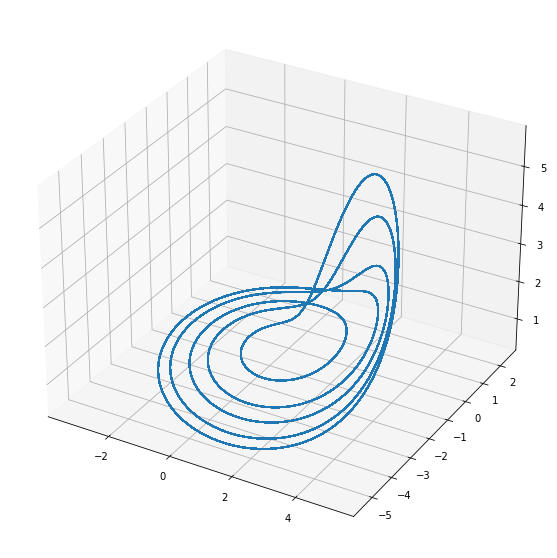

In [21]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection="3d")
ax.plot(x_c,y_c,z_c);

C:\Users\Owner\AppData\Local\Temp\ipykernel_3304\1657719416.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


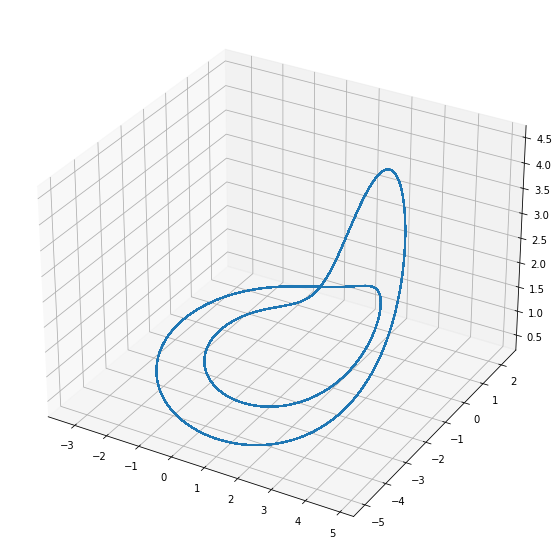

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection="3d")
ax.plot(x_p,y_p,z_p);

In [41]:
from ordpy import ordinal_sequence,ordinal_network

In [45]:
dx=12
taux=9
tie_precision=20

258


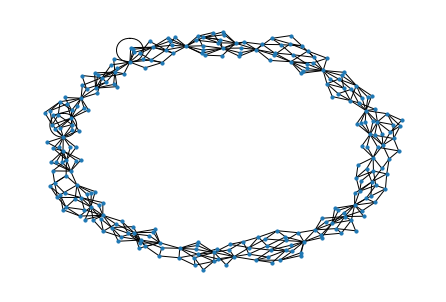

In [58]:
nodes_p, edges_p, weights_p = ordinal_network(x_p,dx=dx,taux=taux)

print(len(nodes_p))

plt.figure()#figsize=(12,7))
H_p = nx.Graph()
H_p.add_nodes_from(nodes_p)
H_p.add_edges_from(edges_p)

pos = nx.kamada_kawai_layout(H_p)
nx.draw(H_p,pos=pos,node_size=10)

nx.write_gexf(H_p,'test_periodic.gexf')

656


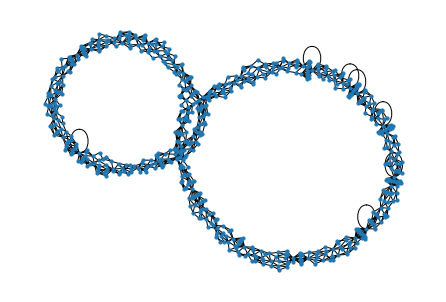

In [59]:
nodes_c, edges_c, weights_c = ordinal_network(x_c,dx=dx,taux=taux)

print(len(nodes_c))

plt.figure()#figsize=(12,7))
H_c = nx.Graph()
H_c.add_nodes_from(nodes_c)
H_c.add_edges_from(edges_c)

pos = nx.kamada_kawai_layout(H_c)
nx.draw(H_c,pos=pos,node_size=10)

nx.write_gexf(H_c,'test_chaotic.gexf')

In [23]:
nx.write_gexf(H,'test_periodic.gexf')

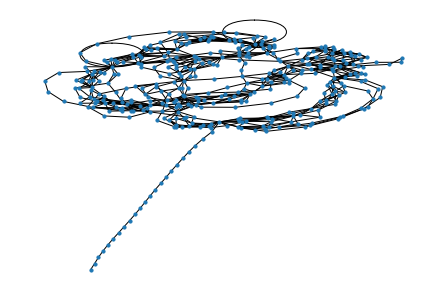

In [20]:
pos = nx.kamada_kawai_layout(H)
nx.draw(H,pos=pos,node_size=10)

In [24]:
plt.figure()#figsize=(12,7))
H = nx.Graph()
H.add_nodes_from(nodes_c)
H.add_edges_from(edges_c)

<Figure size 432x288 with 0 Axes>

In [25]:
nx.write_gexf(H,'test_chaotic.gexf')